In [2]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
div_strength_df = pd.read_csv('indiv_strength_diversity.csv')
div_strength_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion
0,ABabysRights,1,0.083432,0.916568,1,1.0,0.0
1,ABGYNservices,0,0.661536,0.338464,-1,0.0,1.0
2,Abigailschumach,1,0.151695,0.848305,1,1.0,0.0
3,Alboteaparty,0,0.520985,0.479015,1,1.0,0.0
4,alexdelong_,1,0.136951,0.863049,1,1.0,0.0


In [4]:
hashtag_div_strength_df = pd.read_csv('hashtag_indiv_strength_diversity.csv')
hashtag_div_strength_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion
0,ABabysRights,1,0.112896,0.887104,1,1.0,0.0
1,ABGYNservices,0,0.541203,0.458797,-1,0.0,1.0
2,Abigailschumach,1,0.305871,0.694129,1,1.0,0.0
3,Alboteaparty,0,0.561752,0.438248,1,1.0,0.0
4,alexdelong_,1,0.141862,0.858138,1,1.0,0.0


$follower\_of$ column is marked as -1 if the account is a follower of prochoice account, 1 if the account is a follower of prolife account, 0 if both.

---
#### Examine the the correlation between the "prochoice_strength", "prolife_strength" and the "follower of" with respect to the hashtag

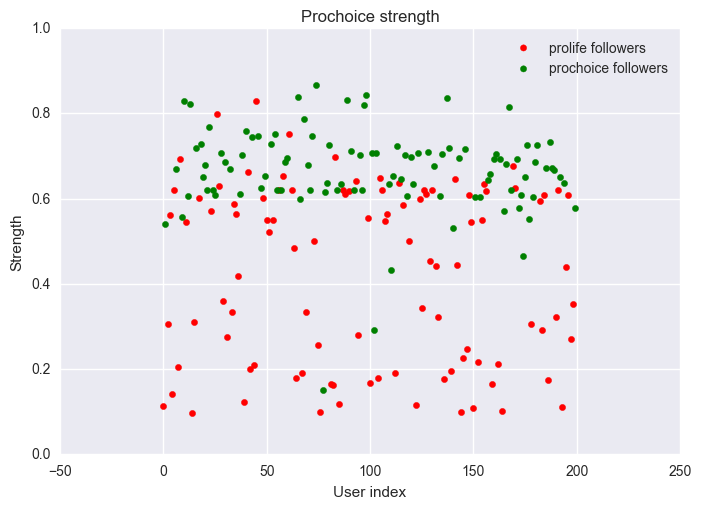

In [5]:
plt.scatter(x=hashtag_div_strength_df[hashtag_div_strength_df['follower of']==1].index, 
            y=hashtag_div_strength_df.loc[hashtag_div_strength_df['follower of']==1, 'prochoice_strength'],
           color='r', label='prolife followers')
plt.scatter(x=hashtag_div_strength_df[hashtag_div_strength_df['follower of']==-1].index, 
            y=hashtag_div_strength_df.loc[hashtag_div_strength_df['follower of']==-1, 'prochoice_strength'],
           color='g', label='prochoice followers')
plt.legend(loc='upper right', shadow=True)
plt.title("Prochoice strength")
plt.xlabel("User index")
plt.ylabel("Strength")
plt.show()

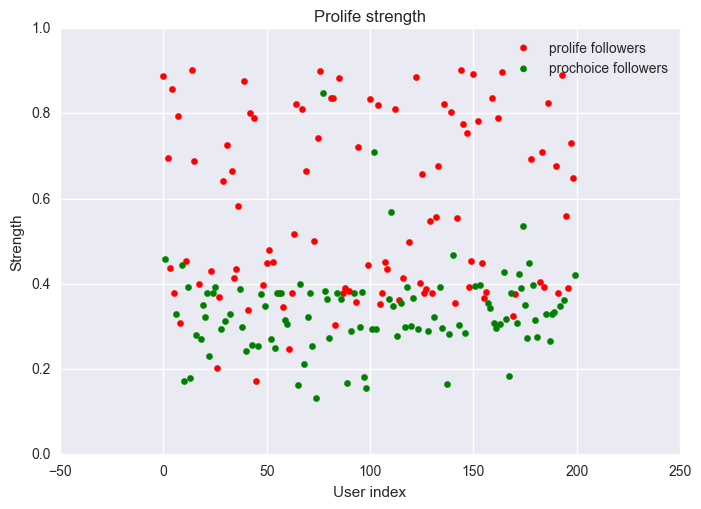

In [6]:
plt.scatter(x=hashtag_div_strength_df[hashtag_div_strength_df['follower of']==1].index, 
            y=hashtag_div_strength_df.loc[hashtag_div_strength_df['follower of']==1, 'prolife_strength'],
           color='r', label='prolife followers')
plt.scatter(x=hashtag_div_strength_df[hashtag_div_strength_df['follower of']==-1].index, 
            y=hashtag_div_strength_df.loc[hashtag_div_strength_df['follower of']==-1, 'prolife_strength'],
           color='g', label='prochoice followers')
plt.legend(loc='upper right', shadow=True)
plt.title("Prolife strength")
plt.xlabel("User index")
plt.ylabel("Strength")
plt.show()

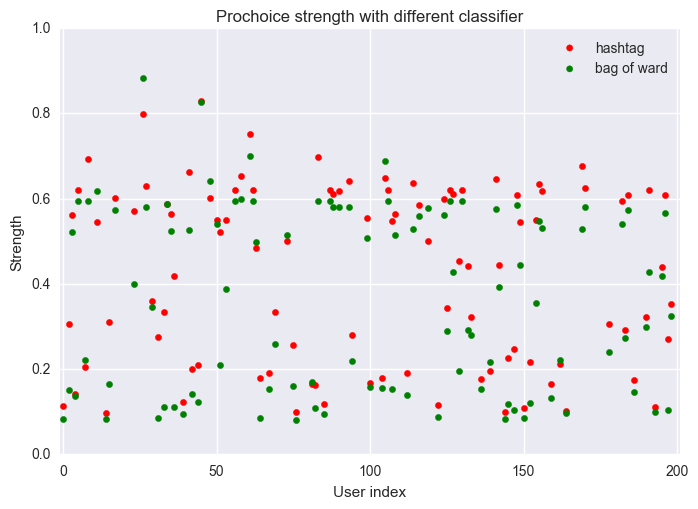

In [7]:
plt.scatter(x=hashtag_div_strength_df[hashtag_div_strength_df['follower of']==1].index, 
            y=hashtag_div_strength_df.loc[hashtag_div_strength_df['follower of']==1, 'prochoice_strength'],
           color='r', label='hashtag')
plt.scatter(x=div_strength_df[hashtag_div_strength_df['follower of']==1].index, 
            y=div_strength_df.loc[hashtag_div_strength_df['follower of']==1, 'prochoice_strength'],
           color='g', label='bag of ward')
plt.legend(loc='upper right', shadow=True)
plt.title("Prochoice strength with different classifier")
plt.xlim([-1, 201])
plt.xlabel("User index")
plt.ylabel("Strength")
plt.show()

# Combine the Stance data with diversity and strength

In [8]:
stance = sio.loadmat('stance.mat')
indiv_stance = stance['indiv_stance'][0]
individual_acnt_order = stance['individual_account order'] 
individual_acnt_order = [s.strip() for s in individual_acnt_order]
print("stance shape:", indiv_stance.shape)

stance shape: (200,)


In [10]:
stance_df = pd.DataFrame(
    {
    "account_name": individual_acnt_order, 
    "stance": indiv_stance
    }
)
stance_df.head()

,account_name,stance
0,ABabysRights,-0.795455
1,ABGYNservices,0.075472
2,Abigailschumach,0.169264
3,Alboteaparty,0.107345
4,alexdelong_,0.183432


In [11]:
info_w_hashtag_df = pd.merge(hashtag_div_strength_df, stance_df, on='account_name', how='left')
print(info_w_hashtag_df.shape)
info_w_hashtag_df.head()

(200, 8)


,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
0,ABabysRights,1,0.112896,0.887104,1,1.0,0.0,-0.795455
1,ABGYNservices,0,0.541203,0.458797,-1,0.0,1.0,0.075472
2,Abigailschumach,1,0.305871,0.694129,1,1.0,0.0,0.169264
3,Alboteaparty,0,0.561752,0.438248,1,1.0,0.0,0.107345
4,alexdelong_,1,0.141862,0.858138,1,1.0,0.0,0.183432


In [12]:
info_df = pd.merge(div_strength_df, stance_df, on='account_name', how='left')
print(info_df.shape)
info_df.head()

(200, 8)


,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
0,ABabysRights,1,0.083432,0.916568,1,1.0,0.0,-0.795455
1,ABGYNservices,0,0.661536,0.338464,-1,0.0,1.0,0.075472
2,Abigailschumach,1,0.151695,0.848305,1,1.0,0.0,0.169264
3,Alboteaparty,0,0.520985,0.479015,1,1.0,0.0,0.107345
4,alexdelong_,1,0.136951,0.863049,1,1.0,0.0,0.183432


The stance is in the range [-1, 1], 1 = prochoice, -1 = prolife.

In [29]:
info_df['stance'].isnull().all()

False

---
#### Examine the the correlation between the "stance" and the "follower of" with respect to the hashtag

Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice


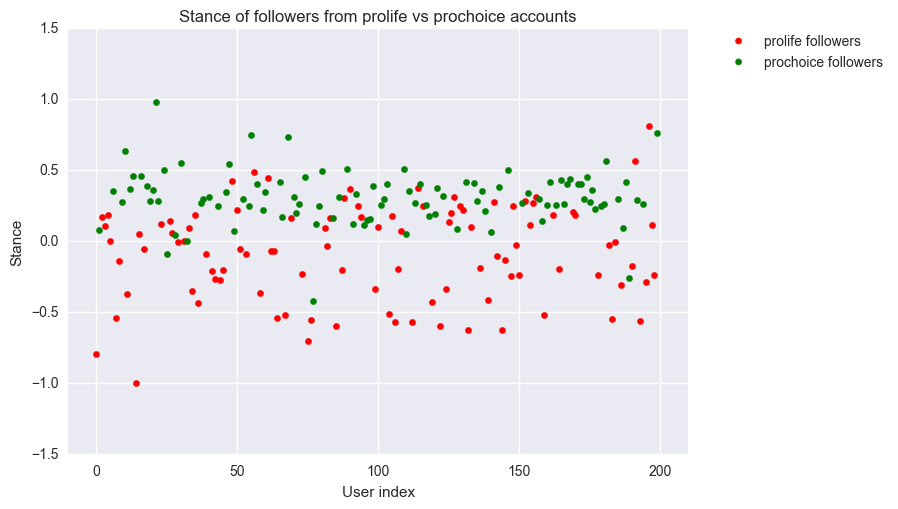

In [13]:
print("Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice")

plt.scatter(x=info_df[info_df['follower of']==1].index, y=info_df.loc[info_df['follower of']==1, 'stance'],
            color='r', label='prolife followers')
plt.scatter(x=info_df[info_df['follower of']==-1].index, y=info_df.loc[info_df['follower of']==-1, 'stance'],
            color='g', label='prochoice followers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Stance of followers from prolife vs prochoice accounts")
plt.xlabel("User index")
plt.ylabel("Stance")
plt.xlim([-10, 210])
plt.show()

---
#### Plot the relationship between the stance and the following proportions

In [15]:
info_df.loc[info_df["follower of"]==1].index

Int64Index([  0,   2,   3,   4,   5,   7,   8,  11,  14,  15,  17,  23,  26,
             27,  29,  31,  33,  34,  35,  36,  39,  41,  42,  44,  45,  48,
             50,  51,  53,  56,  58,  61,  62,  63,  64,  67,  69,  73,  75,
             76,  81,  82,  83,  85,  87,  88,  90,  93,  94,  99, 100, 104,
            105, 106, 107, 108, 112, 114, 116, 119, 122, 124, 125, 126, 127,
            129, 130, 132, 133, 136, 139, 141, 142, 144, 145, 147, 148, 149,
            150, 152, 154, 155, 156, 159, 162, 164, 169, 170, 178, 182, 183,
            184, 186, 190, 191, 193, 195, 196, 197, 198],
           dtype='int64')

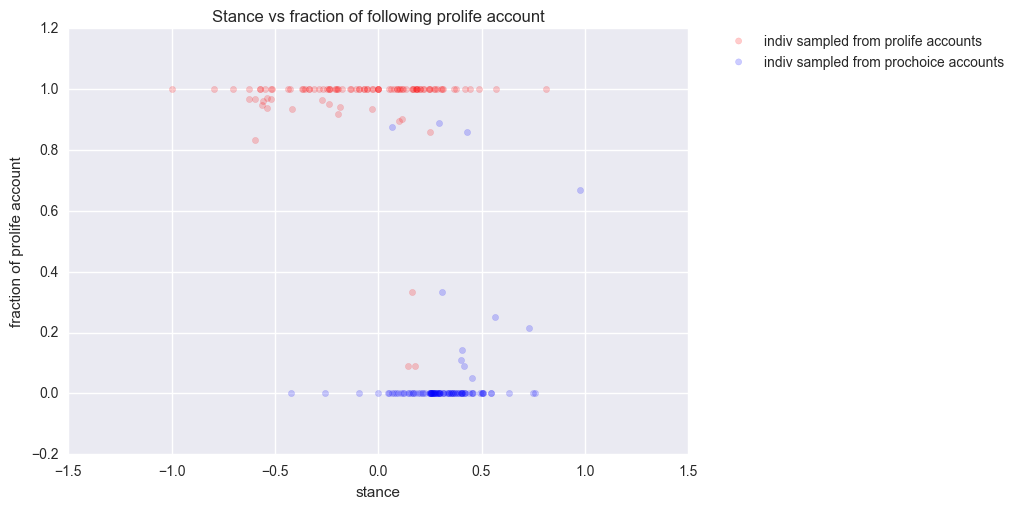

In [32]:
plt.scatter(x=info_df.loc[info_df["follower of"]==1, "stance"], 
            y=info_df.loc[info_df["follower of"]==1, "prolife proportion"], alpha=0.2, color='r',
            label="indiv sampled from prolife accounts")


    
plt.scatter(x=info_df.loc[info_df["follower of"]==-1, "stance"], 
            y=info_df.loc[info_df["follower of"]==-1, "prolife proportion"], alpha=0.2, color='b',
            label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("fraction of prolife account")
plt.xlabel("stance")
plt.title("Stance vs fraction of following prolife account")
plt.show()

Ordinary users whose stance is greater than 0 follow 

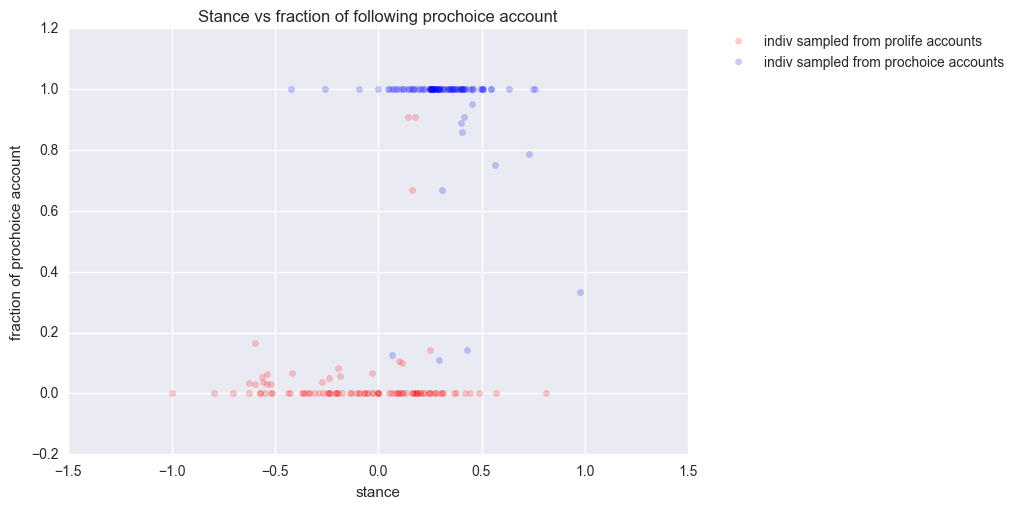

In [77]:
plt.scatter(x=info_df.loc[info_df["follower of"]==1, "stance"], 
            y=info_df.loc[info_df["follower of"]==1, "prochoice proportion"], alpha=0.2, color='r',
            label="indiv sampled from prolife accounts")
plt.scatter(x=info_df.loc[info_df["follower of"]==-1, "stance"], 
            y=info_df.loc[info_df["follower of"]==-1, "prochoice proportion"], alpha=0.2, color='b',
            label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("fraction of prochoice account")
plt.xlabel("stance")
plt.title("Stance vs fraction of following prochoice account")
plt.show()

--------
#### Get unusal individuals

In [35]:
info_df.loc[(info_df["stance"]>0.0) and (info_df["prolife proportion"]>info_df["prochoice proportion"]), "stance"]

0     -0.795455
2      0.169264
3      0.107345
4      0.183432
5      0.000000
7     -0.538253
8     -0.138298
11    -0.368421
14    -1.000000
15     0.052632
17    -0.052632
21     0.976915
23     0.118012
27     0.060000
29    -0.002320
31     0.000000
33     0.093199
34    -0.353939
35     0.183865
36    -0.437426
39    -0.090909
41    -0.209231
42    -0.269184
44    -0.270548
45    -0.200000
48     0.421935
50     0.218884
51    -0.055283
53    -0.092420
56     0.485714
         ...   
141    0.272727
142   -0.106557
144   -0.623881
145   -0.133333
147   -0.245714
148    0.248050
149   -0.026786
150   -0.237799
152    0.285141
154    0.114596
155    0.267931
156    0.311197
159   -0.519324
162    0.187192
164   -0.192982
165    0.428571
169    0.204598
170    0.187500
178   -0.237632
182   -0.028846
183   -0.546505
184   -0.002469
186   -0.311311
190   -0.175043
191    0.567901
193   -0.563077
195   -0.286182
196    0.813953
197    0.116466
198   -0.237345
Name: stance, dtype: flo

---
#### Distribution of the following fractions from individuals sampled from prolife group and prochoice group

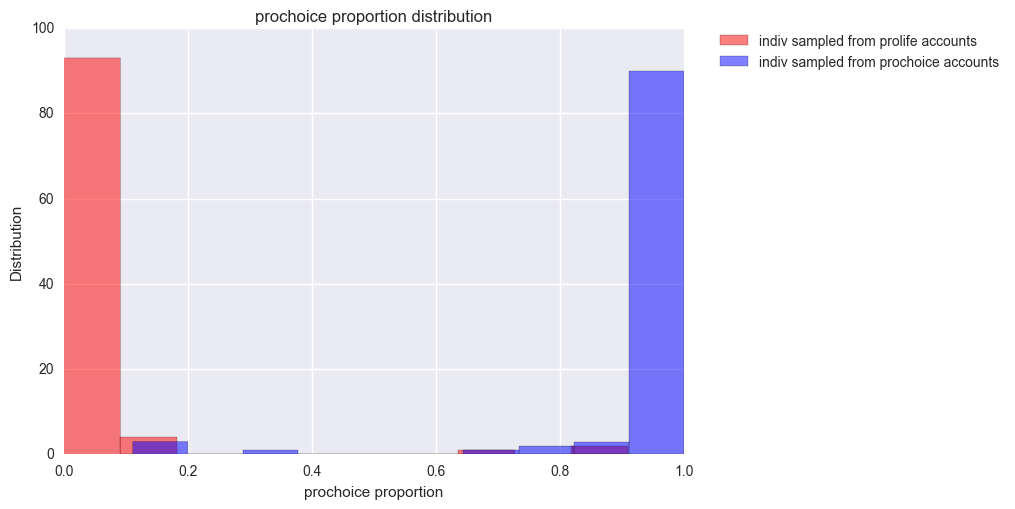

In [87]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prochoice proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prochoice proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prochoice proportion")
plt.title("prochoice proportion distribution")
plt.show()

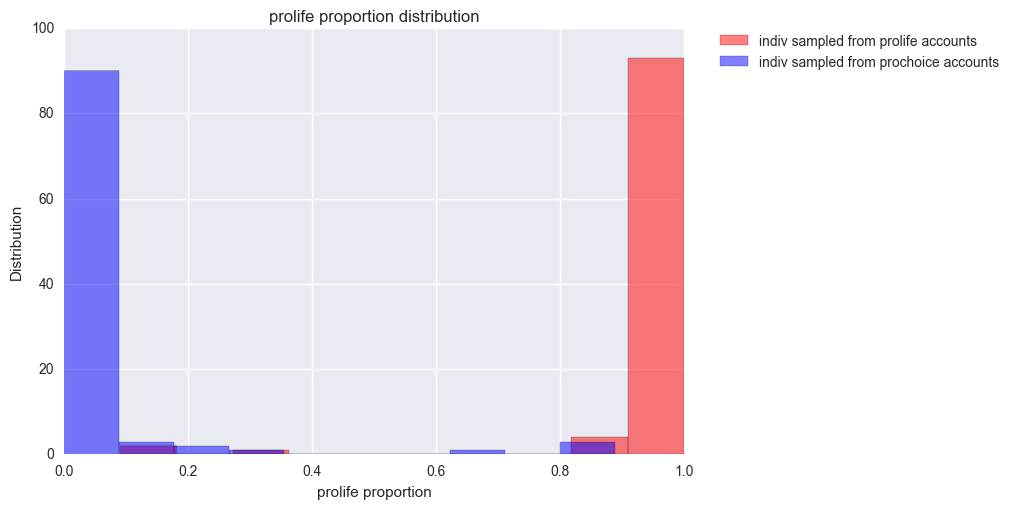

In [88]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prolife proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prolife proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prolife proportion")
plt.title("prolife proportion distribution")
plt.show()